# Note:
Lab2 is Q6-Q12 of Assignment 1 (Basic EDA).

    -Univariate analysis:
    6. Statistic description for each variable.
    7. Visualization for each variable.
    8. Spot outliers by box plots and express your way to handle outliers.
    9. Normalizing analysis for numeric data.
    10. Check and visualize whether your data is imbalanced or not

    -Bivariate analysis:
    11. Correlation Analysis and visualization using heatmap
    12. Pairwise visualization

    -Multivariate analysis (not required in Assignment 1)
    which includes numbers of advanced techniques,such as advanced statistic methods, 
    or decision rule, associate rule, clustering etc.

# Load Required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
path = 'OnlineNewsPopularity.csv'
df = pd.read_csv(path)

# Finding out basic information 

In [3]:
df.shape

(39644, 60)

In [4]:
df.head(10)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731,12,219,0.663594,1.0,0.815385,4,2,1,0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731,9,255,0.604743,1.0,0.791946,3,1,1,0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731,9,211,0.575130,1.0,0.663866,3,1,1,0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731,9,531,0.503788,1.0,0.665635,9,0,1,0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,731,10,370,0.559889,1.0,0.698198,2,2,0,0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,731,8,960,0.418163,1.0,0.549834,21,20,20,0,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,731,12,989,0.433574,1.0,0.572108,20,20,20,0,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,731,11,97,0.670103,1.0,0.836735,2,0,0,0,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,731,10,231,0.636364,1.0,0.797101,4,1,1,1,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


   Attribute Information:
    0. url:                           URL of the article
    1. timedelta:                     Days between the article publication and the dataset acquisition
    2. n_tokens_title:                Number of words in the title
    3. n_tokens_content:              Number of words in the content
    4. n_unique_tokens:               Rate of unique words in the content
    5. n_non_stop_words:              Rate of non-stop words in the content
    6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the content
    7. num_hrefs:                     Number of links
    8. num_self_hrefs:                Number of links to other articles published by Mashable
    9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the content
    12. num_keywords:                  Number of keywords in the metadata
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
    28. self_reference_min_shares:     Min. shares of referenced articles in Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral tokens
    49. rate_negative_words:           Rate of negative words among non-neutral tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
    60. shares:                        Number of shares (target)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_s

We can observe that, there are no null values in any of the columns, which is great news...

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      39644 non-null  int64  
 1   n_tokens_title                 39644 non-null  int64  
 2   n_tokens_content               39644 non-null  int64  
 3   n_unique_tokens                39644 non-null  float64
 4   n_non_stop_words               39644 non-null  float64
 5   n_non_stop_unique_tokens       39644 non-null  float64
 6   num_hrefs                      39644 non-null  int64  
 7   num_self_hrefs                 39644 non-null  int64  
 8   num_imgs                       39644 non-null  int64  
 9   num_videos                     39644 non-null  int64  
 10  average_token_length           39644 non-null  float64
 11  num_keywords                   39644 non-null  int64  
 12  data_channel_is_lifestyle      39644 non-null 

#  Univariate Analysis

## Provide Basic Statistic Description

In [8]:
def convert_cat(col):
    df[col] = df[col].astype('category')
    return df[col]

In [9]:
convert_cat('data_channel_is_lifestyle')
convert_cat('data_channel_is_entertainment')
convert_cat('data_channel_is_bus')
convert_cat('data_channel_is_socmed')
convert_cat('data_channel_is_tech')
convert_cat('data_channel_is_world')
convert_cat('weekday_is_monday')
convert_cat('weekday_is_tuesday')
convert_cat('weekday_is_wednesday')
convert_cat('weekday_is_thursday')
convert_cat('weekday_is_friday')
convert_cat('weekday_is_saturday')
convert_cat('weekday_is_sunday')
convert_cat('is_weekend')

0        0
1        0
2        0
3        0
4        0
        ..
39639    0
39640    0
39641    0
39642    0
39643    0
Name: is_weekend, Length: 39644, dtype: category
Categories (2, int64): [0, 1]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   timedelta                      39644 non-null  int64   
 1   n_tokens_title                 39644 non-null  int64   
 2   n_tokens_content               39644 non-null  int64   
 3   n_unique_tokens                39644 non-null  float64 
 4   n_non_stop_words               39644 non-null  float64 
 5   n_non_stop_unique_tokens       39644 non-null  float64 
 6   num_hrefs                      39644 non-null  int64   
 7   num_self_hrefs                 39644 non-null  int64   
 8   num_imgs                       39644 non-null  int64   
 9   num_videos                     39644 non-null  int64   
 10  average_token_length           39644 non-null  float64 
 11  num_keywords                   39644 non-null  int64   
 12  data_channel_is_lifestyle      3

In [11]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [12]:
df.describe(include=['category'])

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend
count,39644,39644,39644,39644,39644,39644,39644,39644,39644,39644,39644,39644,39644,39644
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,37545,32587,33386,37321,32298,31217,32983,32254,32209,32377,33943,37191,36907,34454


## Visulization of Single Variable

### Plot a Histogram for numerical variables

<AxesSubplot:xlabel='shares', ylabel='Count'>

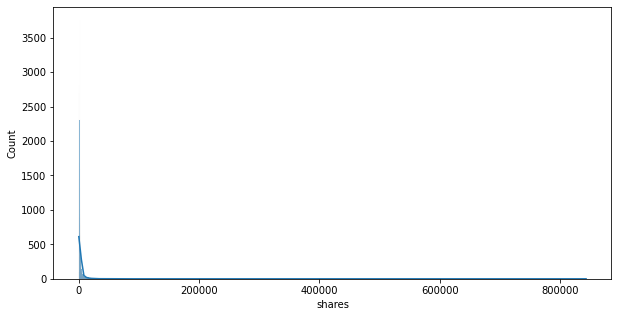

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df.shares,kde=True)

<AxesSubplot:xlabel='shares'>

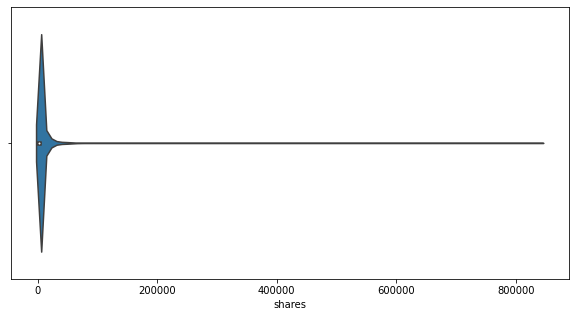

In [14]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df['shares'])

<AxesSubplot:xlabel='shares'>

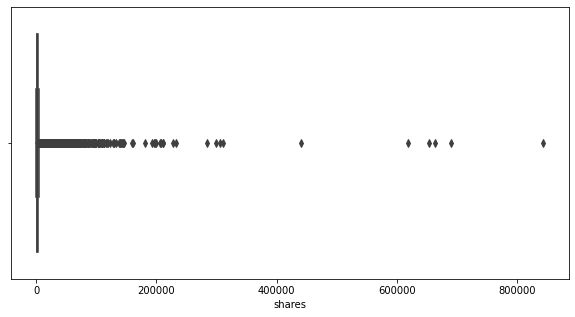

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.shares)

<AxesSubplot:xlabel='timedelta', ylabel='shares'>

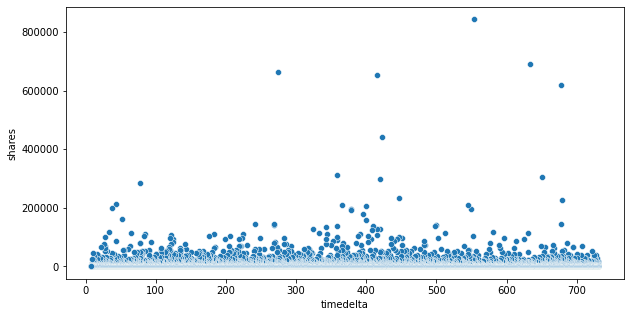

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='timedelta',y='shares')

We can see that the data is very skewed. We can also observe that there are very low no. of articles with very large number of shares. The 4rd scatter plot confirms the same. 

There are more outliers such as after 400 days more articles have been shared more than 20k times;
These outliers are not helping to check the exact distribution of data and are skewing the results.

So, next let us try to find and remove the **outliers**

## Spot outliers (numeric variables)

In [18]:
Q1 = df['shares'].quantile(0.25)
Q3 = df['shares'].quantile(0.75)
IQR = Q3 - Q1
LTV= Q1 - (1.5 * IQR)
UTV= Q3 + (1.5 * IQR)
df = df.drop(df[df['shares'] > UTV].index)
df.shape

(35103, 60)

After removing the outliers, let us try to plot the same graphs

<AxesSubplot:xlabel='timedelta', ylabel='shares'>

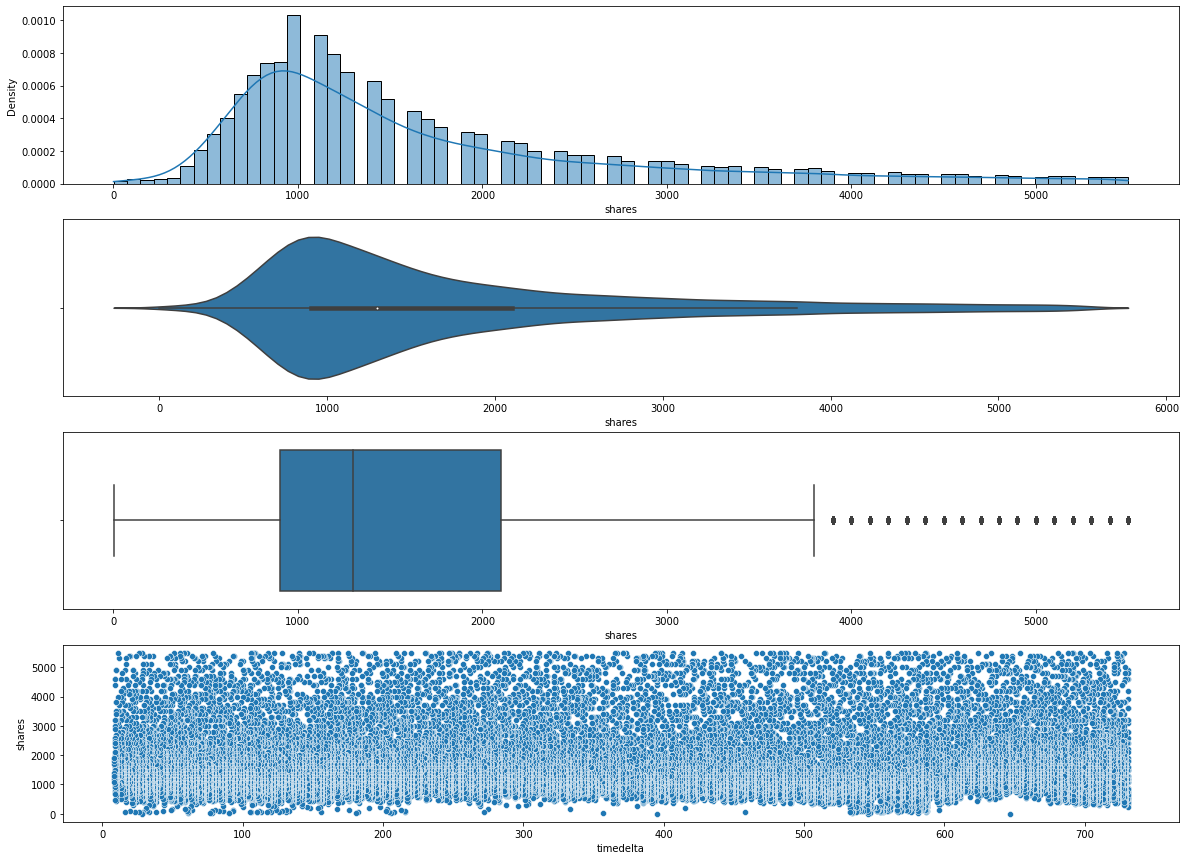

In [19]:
plt.subplots(4,1,figsize=(20,15))
plt.subplot(4,1,1)
sns.histplot(x=df.shares,kde=True,stat="density")
plt.subplot(4,1,2)
sns.violinplot(x=df['shares'])
plt.subplot(4,1,3)
sns.boxplot(x=df.shares)
plt.subplot(4,1,4)
sns.scatterplot(data=df,x='timedelta',y='shares')

In [20]:
lifestyle=df[df.data_channel_is_lifestyle == 1].shape[0]
entertainment=df[df.data_channel_is_entertainment == 1].shape[0]
business=df[df.data_channel_is_bus == 1].shape[0]
socialmedia=df[df.data_channel_is_socmed == 1].shape[0]
technical=df[df.data_channel_is_tech == 1].shape[0]
world=df[df.data_channel_is_world == 1].shape[0]

In [21]:
monday=df[df.weekday_is_monday == 1].shape[0]
tuesday=df[df.weekday_is_tuesday == 1].shape[0]
wednesday=df[df.weekday_is_wednesday == 1].shape[0]
thursday=df[df.weekday_is_thursday == 1].shape[0]
friday=df[df.weekday_is_friday == 1].shape[0]
saturday=df[df.weekday_is_saturday == 1].shape[0]
sunday=df[df.weekday_is_sunday == 1].shape[0]
weekend=df[df.is_weekend == 1].shape[0]

<BarContainer object of 8 artists>

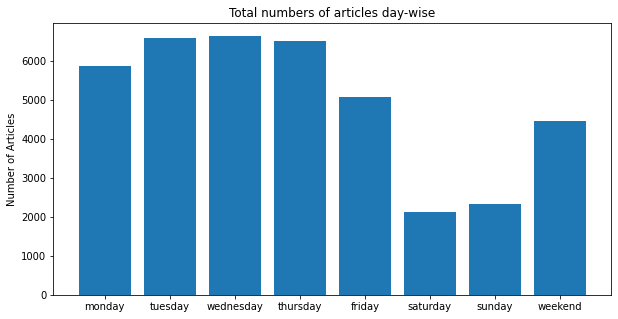

In [22]:
articles_publishing_days= np.array([monday,tuesday,wednesday,thursday,friday,saturday,sunday,weekend])
fig= plt.figure(figsize=(10,5))
ax=fig.gca()
ax.set_title('Total numbers of articles day-wise')
ax.set_ylabel('Number of Articles')
plt.bar(x=['monday','tuesday','wednesday','thursday','friday','saturday','sunday','weekend'],height=articles_publishing_days)

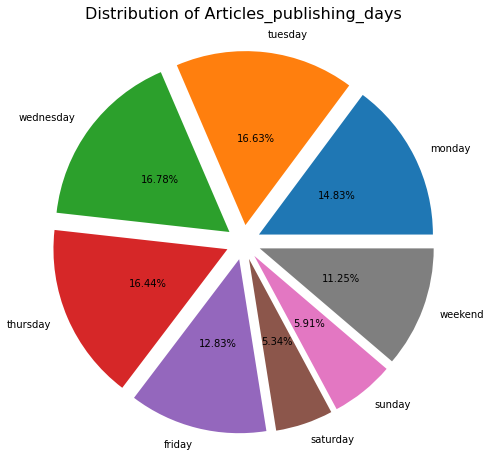

In [23]:
plt.figure(figsize=(8,8))
plt.pie(articles_publishing_days,autopct="%.2f%%",labels=['monday','tuesday','wednesday','thursday','friday','saturday','sunday','weekend'],
        explode=[0.1]*8, pctdistance=0.5)
plt.title("Distribution of Articles_publishing_days",fontsize = 16)
plt.show()

# Bivariate Analysis

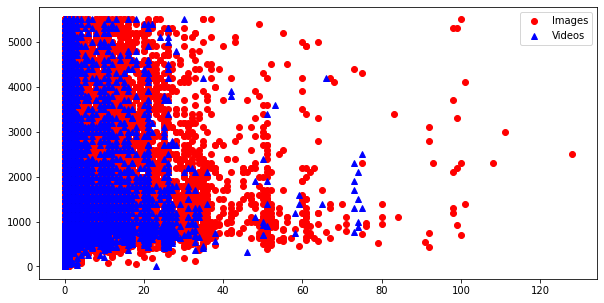

In [24]:
plt.figure(figsize=(10,5))
plt.plot(df.num_imgs,df.shares,'ro',label='Images')
plt.plot(df.num_videos,df.shares,'b^',label='Videos')
plt.legend()

### This was for getting the relation between number of videos and images in an article with their corresponding shares.

1) If number of videos and images exceeds 80 then shares come close to 0-5k.

2) Most of the articles between 0-40 images and videos has been shared 0-20k times

<AxesSubplot:xlabel='n_tokens_content', ylabel='shares'>

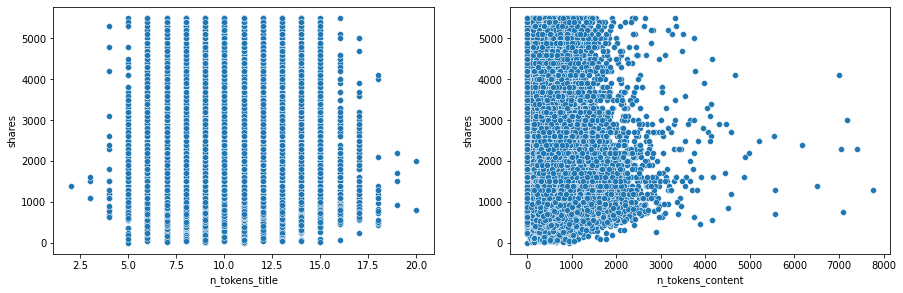

In [25]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.scatterplot(x=df['n_tokens_title'],y=df['shares'])
plt.subplot(2,2,2)
sns.scatterplot(x=df['n_tokens_content'],y=df['shares'])

(array([ 1584., 13148.,  7810.,  4778.,  2335.,  1910.,  1219.,  1001.,
          679.,   639.]),
 array([1.0000e+00, 5.5090e+02, 1.1008e+03, 1.6507e+03, 2.2006e+03,
        2.7505e+03, 3.3004e+03, 3.8503e+03, 4.4002e+03, 4.9501e+03,
        5.5000e+03]),
 <BarContainer object of 10 artists>)

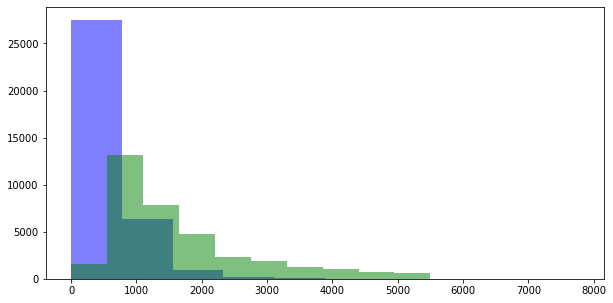

In [26]:
plt.figure(figsize=(10,5))
plt.hist(df['n_tokens_content'],alpha=0.5,color='b')
plt.hist(df['shares'],alpha=0.5,color='g')

## Observations:

1) Too short and too long titles are not getting good response. Words between 5-18 are good.

2) Total words between 0-20k are getting the higher response.Above 20k articles have not been shared more than 500 times.

3) Both "shares" and "n_number_tokens" are right skewed.That means data is concentrated in lower half.

In [27]:
lifestyle_articles=df[df.data_channel_is_lifestyle == 1]['shares'].sum()
entertainment_articles=df[df.data_channel_is_entertainment == 1]['shares'].sum()
business_articles=df[df.data_channel_is_bus == 1]['shares'].sum()
socialmedia_articles=df[df.data_channel_is_socmed == 1]['shares'].sum()
technical_articles=df[df.data_channel_is_tech == 1]['shares'].sum()
world_articles=df[df.data_channel_is_world == 1]['shares'].sum()

<BarContainer object of 6 artists>

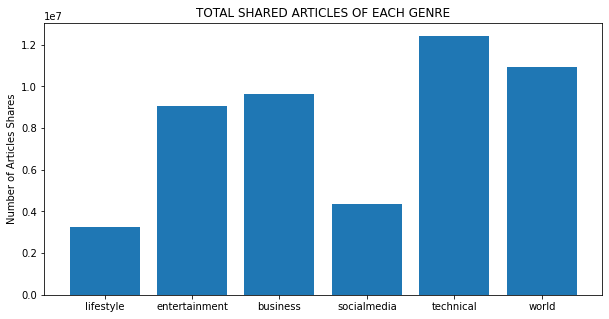

In [28]:
articles_types=np.array([lifestyle_articles,entertainment_articles,business_articles,socialmedia_articles,technical_articles,world_articles],
                        dtype=np.int64)
fig= plt.figure(figsize=(10,5))
ax=fig.gca()
ax.set_ylabel('Number of Articles Shares')
ax.set_title('TOTAL SHARED ARTICLES OF EACH GENRE')
plt.bar(x=['lifestyle','entertainment','business','socialmedia','technical','world'],height=articles_types)

In [29]:
articles_types

array([ 3274579,  9040828,  9635670,  4354657, 12418793, 10951435],
      dtype=int64)

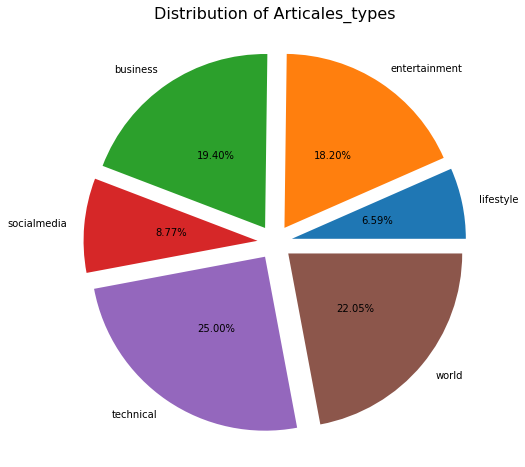

In [30]:
plt.figure(figsize=(8,8))
plt.pie(articles_types,autopct="%.2f%%",labels=['lifestyle','entertainment','business','socialmedia','technical','world'],
        explode=[0.1]*6, pctdistance=0.5)
plt.title("Distribution of Articales_types",fontsize = 16)
plt.show()

### Observations:

1) Technical genre articles are the highest ones in sharing order.

2) lifestyle articles are shared the least.

In [31]:
monday_articles=df[df.weekday_is_monday == 1]['shares'].sum()
tuesday_articles=df[df.weekday_is_tuesday == 1]['shares'].sum()
wednesday_articles=df[df.weekday_is_wednesday == 1]['shares'].sum()
thursday_articles=df[df.weekday_is_thursday == 1]['shares'].sum()
friday_articles=df[df.weekday_is_friday == 1]['shares'].sum()
saturday_articles=df[df.weekday_is_saturday == 1]['shares'].sum()
sunday_articles=df[df.weekday_is_sunday == 1]['shares'].sum()
weekend_articles=df[df.is_weekend == 1]['shares'].sum()

<BarContainer object of 8 artists>

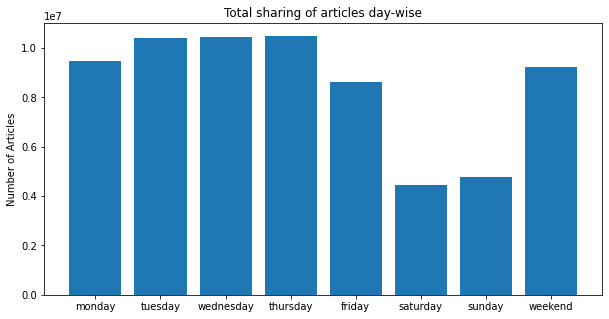

In [32]:
articles_publishing_days= np.array([monday_articles,tuesday_articles,wednesday_articles,thursday_articles,friday_articles,
                                    saturday_articles,sunday_articles,weekend_articles])
fig= plt.figure(figsize=(10,5))
ax=fig.gca()
ax.set_title('Total sharing of articles day-wise')
ax.set_ylabel('Number of Articles')
plt.bar(x=['monday','tuesday','wednesday','thursday','friday','saturday','sunday','weekend'],height=articles_publishing_days)

In [33]:
Lda_00=pd.DataFrame(df.groupby(by=['LDA_00'])['shares'].sum().sort_values(ascending=False)).reset_index()
Lda_01=pd.DataFrame(df.groupby(by=['LDA_01'])['shares'].sum().sort_values(ascending=False)).reset_index()
Lda_02=pd.DataFrame(df.groupby(by=['LDA_02'])['shares'].sum().sort_values(ascending=False)).reset_index()
Lda_03=pd.DataFrame(df.groupby(by=['LDA_03'])['shares'].sum().sort_values(ascending=False)).reset_index()
Lda_04=pd.DataFrame(df.groupby(by=['LDA_04'])['shares'].sum().sort_values(ascending=False)).reset_index()

In [34]:
mean_lda_00=np.mean(Lda_00[Lda_00['shares'] > 50])[0]
mean_lda_01=np.mean(Lda_01[Lda_01['shares'] > 50])[0]
mean_lda_02=np.mean(Lda_02[Lda_02['shares'] > 50])[0]
mean_lda_03=np.mean(Lda_03[Lda_03['shares'] > 50])[0]
mean_lda_04=np.mean(Lda_04[Lda_04['shares'] > 50])[0]

<BarContainer object of 5 artists>

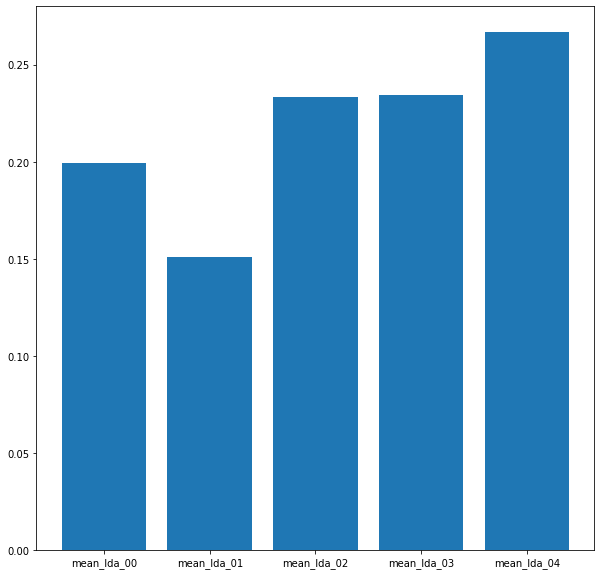

In [35]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
plt.bar(x=['mean_lda_00','mean_lda_01','mean_lda_02','mean_lda_03','mean_lda_04'],
        height=[mean_lda_00,mean_lda_01,mean_lda_02,mean_lda_03,mean_lda_04])

<AxesSubplot:xlabel='global_subjectivity', ylabel='shares'>

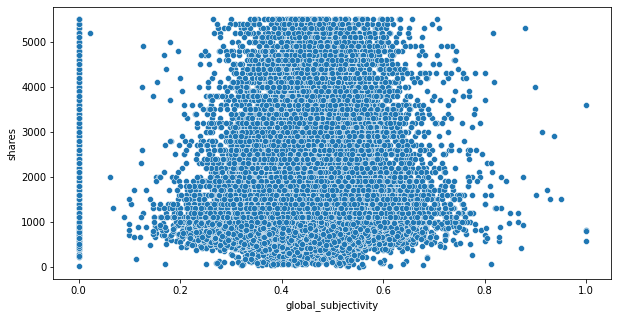

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['global_subjectivity'],y=df['shares'])

## Correlation Analysis - Find dependent variables
    Nongraphic or graphic ways

In [37]:
columns_group=['global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares']

In [38]:
df[columns_group].corr().round(4)

,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
global_sentiment_polarity,1.0000,0.5753,-0.4746,0.7305,-0.6595,0.4989,0.0829,0.4304,0.2369,0.2937,-0.0423,0.0248,0.2387,-0.0362,0.0696,0.0633
global_rate_positive_words,0.5753,1.0000,0.0997,0.6242,-0.3457,0.3272,-0.1140,0.4703,-0.1210,-0.1032,-0.0668,0.1149,0.1406,-0.1449,0.1069,0.0633
global_rate_negative_words,-0.4746,0.0997,1.0000,-0.4186,0.7782,0.1844,0.0541,0.1737,-0.3484,-0.4773,0.0770,0.0889,-0.1364,-0.0505,0.0568,-0.0255
rate_positive_words,0.7305,0.6242,-0.4186,1.0000,-0.5577,0.4001,0.0426,0.4388,-0.0180,0.1088,-0.1946,-0.0195,0.1492,-0.0254,-0.0008,0.0447
rate_negative_words,-0.6595,-0.3457,0.7782,-0.5577,1.0000,0.1300,0.1883,0.0186,-0.3414,-0.4500,0.0323,-0.0072,-0.1849,0.0488,-0.0269,-0.0676
avg_positive_polarity,0.4989,0.3272,0.1844,0.4001,0.1300,1.0000,0.4478,0.6954,-0.2625,-0.2204,-0.1312,0.0474,0.0820,0.0159,0.0958,0.0190
min_positive_polarity,0.0829,-0.1140,0.0541,0.0426,0.1883,0.4478,1.0000,-0.0057,-0.0516,0.1008,-0.1790,0.0048,-0.0006,0.0159,0.0082,-0.0320
max_positive_polarity,0.4304,0.4703,0.1737,0.4388,0.0186,0.6954,-0.0057,1.0000,-0.2592,-0.3520,0.0026,0.0513,0.0789,-0.0181,0.0811,0.0332
avg_negative_polarity,0.2369,-0.1210,-0.3484,-0.0180,-0.3414,-0.2625,-0.0516,-0.2592,1.0000,0.7484,0.5739,-0.0742,0.0874,-0.0108,-0.0750,-0.0035
min_negative_polarity,0.2937,-0.1032,-0.4773,0.1088,-0.4500,-0.2204,0.1008,-0.3520,0.7484,1.0000,0.0733,-0.0555,0.0810,-0.0156,-0.0584,-0.0049


In [39]:
df[columns_group].corr(method = 'spearman').round(4)

,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
global_sentiment_polarity,1.0000,0.5966,-0.4496,0.8040,-0.6739,0.4912,0.0941,0.4185,0.2342,0.2804,-0.0616,0.0271,0.2236,-0.0357,0.0525,0.0936
global_rate_positive_words,0.5966,1.0000,0.0776,0.5638,-0.4053,0.2237,-0.1146,0.4082,-0.0796,-0.0849,-0.0313,0.1370,0.1752,-0.1481,0.1446,0.0844
global_rate_negative_words,-0.4496,0.0776,1.0000,-0.6663,0.8223,0.1182,0.0475,0.1389,-0.3588,-0.5222,0.0649,0.0761,-0.1366,-0.0384,0.0630,-0.0358
rate_positive_words,0.8040,0.5638,-0.6663,1.0000,-0.8440,0.1288,0.0082,0.2128,0.1649,0.2931,-0.1588,0.0003,0.2063,-0.0402,0.0157,0.0809
rate_negative_words,-0.6739,-0.4053,0.8223,-0.8440,1.0000,0.0300,0.1553,-0.0484,-0.3209,-0.4499,0.0004,-0.0160,-0.2107,0.0501,-0.0318,-0.0856
avg_positive_polarity,0.4912,0.2237,0.1182,0.1288,0.0300,1.0000,0.3208,0.5947,-0.1728,-0.1484,-0.0675,0.0534,0.0559,0.0126,0.0707,0.0359
min_positive_polarity,0.0941,-0.1146,0.0475,0.0082,0.1553,0.3208,1.0000,-0.0696,-0.0296,0.1021,-0.2131,0.0018,-0.0169,0.0096,-0.0020,-0.0588
max_positive_polarity,0.4185,0.4082,0.1389,0.2128,-0.0484,0.5947,-0.0696,1.0000,-0.1996,-0.3014,0.0607,0.0641,0.0771,-0.0263,0.0755,0.0495
avg_negative_polarity,0.2342,-0.0796,-0.3588,0.1649,-0.3209,-0.1728,-0.0296,-0.1996,1.0000,0.7800,0.3732,-0.0690,0.0798,-0.0022,-0.0643,0.0083
min_negative_polarity,0.2804,-0.0849,-0.5222,0.2931,-0.4499,-0.1484,0.1021,-0.3014,0.7800,1.0000,0.0134,-0.0511,0.0768,-0.0081,-0.0444,0.0001


<AxesSubplot:>

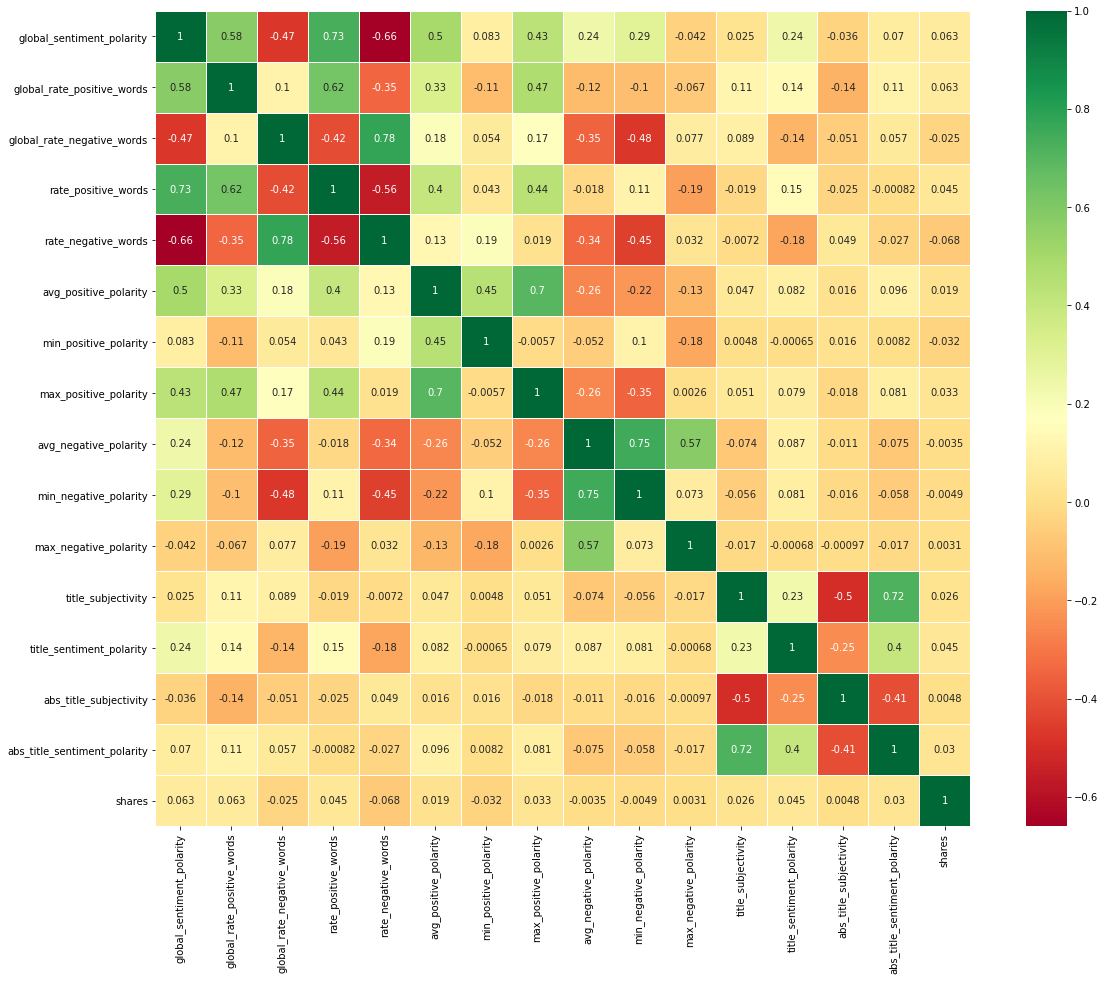

In [40]:
fig,ax = plt.subplots(figsize=(20,15))

sns.heatmap(df[columns_group].corr(),linewidth=1.0,ax=ax,square=True,annot=True,cmap="RdYlGn")

<AxesSubplot:>

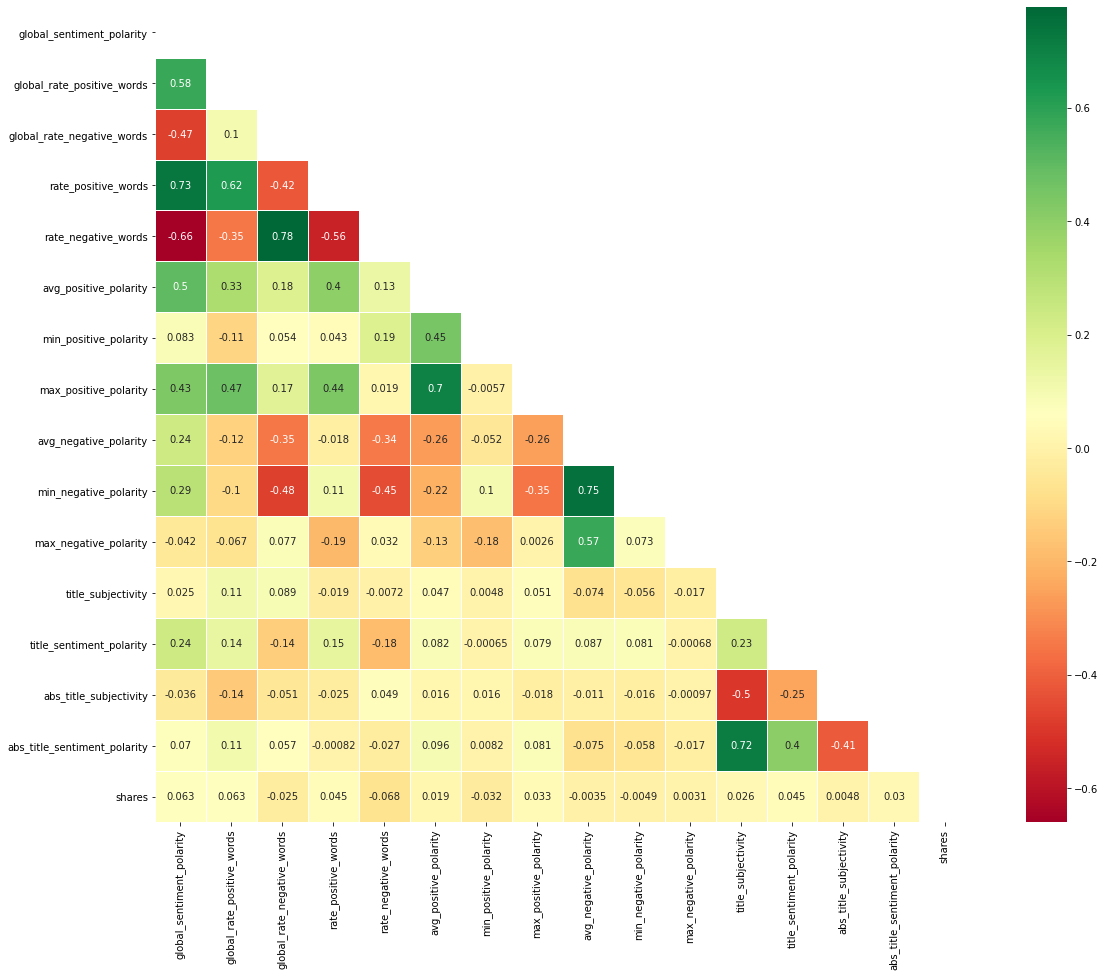

In [41]:
fig,ax = plt.subplots(figsize=(20,15))
matrix = np.triu(df[columns_group].corr())
sns.heatmap(df[columns_group].corr(),linewidth=1.0,ax=ax,square=True,annot=True,cmap="RdYlGn",mask = matrix)

# Multivariate analysis

## Feature Selection

We have seen that there are around 60 features. In this section, we analyse statistically and find which are all the important features to consider.

In [42]:
path = 'OnlineNewsPopularity.csv'
data = pd.read_csv(path)

### Correlation Analysis

In [43]:
df_corr = abs(data.corr())
df_corr = df_corr['shares']
df_corr = pd.DataFrame(df_corr.values, data.columns).reset_index()
df_corr.columns = ['Feature', 'Corr']
df_corr = df_corr[df_corr['Corr'] > 0.01]
df_corr = df_corr.sort_values(by='Corr', ascending=False)[1:].head(20)
df_corr

,Feature,Corr
26,kw_avg_avg,0.110413
41,LDA_03,0.083771
25,kw_max_avg,0.064306
40,LDA_02,0.059163
29,self_reference_avg_sharess,0.057789
27,self_reference_min_shares,0.055958
17,data_channel_is_world,0.049497
28,self_reference_max_shares,0.047115
6,num_hrefs,0.045404
23,kw_avg_max,0.044686


###  Univariate Selection

In [44]:
from sklearn.feature_selection import SelectKBest,f_classif
Y = data['shares'] 
X = data.drop(['shares'], axis=1)

In [45]:
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores = featureScores.sort_values(by='Score', ascending=False).head(20)
featureScores

,Specs,Score
26,kw_avg_avg,2.914700
19,kw_max_min,2.538373
20,kw_avg_min,2.519381
25,kw_max_avg,2.013821
40,LDA_02,1.890151
17,data_channel_is_world,1.862736
41,LDA_03,1.709649
13,data_channel_is_entertainment,1.647385
6,num_hrefs,1.549960
37,is_weekend,1.523939


Now we can find top 20 features based on *correlation* and *ANOVA*. Let us compare and see which are common in both;

In [46]:
idx1 = pd.Index(df_corr['Feature'])
idx2 = pd.Index(featureScores['Specs'])
features_list = idx1.intersection(idx2)
features_list

Index(['kw_avg_avg', 'LDA_03', 'kw_max_avg', 'LDA_02', 'data_channel_is_world',
       'num_hrefs', 'kw_avg_max', 'kw_min_avg', 'global_subjectivity',
       'kw_avg_min', 'kw_max_min', 'average_token_length'],
      dtype='object')

Above are common features in both Corr and ANOVA. 

Next step, we can analyse if any of there features are highly correlated to each other using a heatmap. We can keep one of highly correlated features.

### Features shortlisting 

<AxesSubplot:>

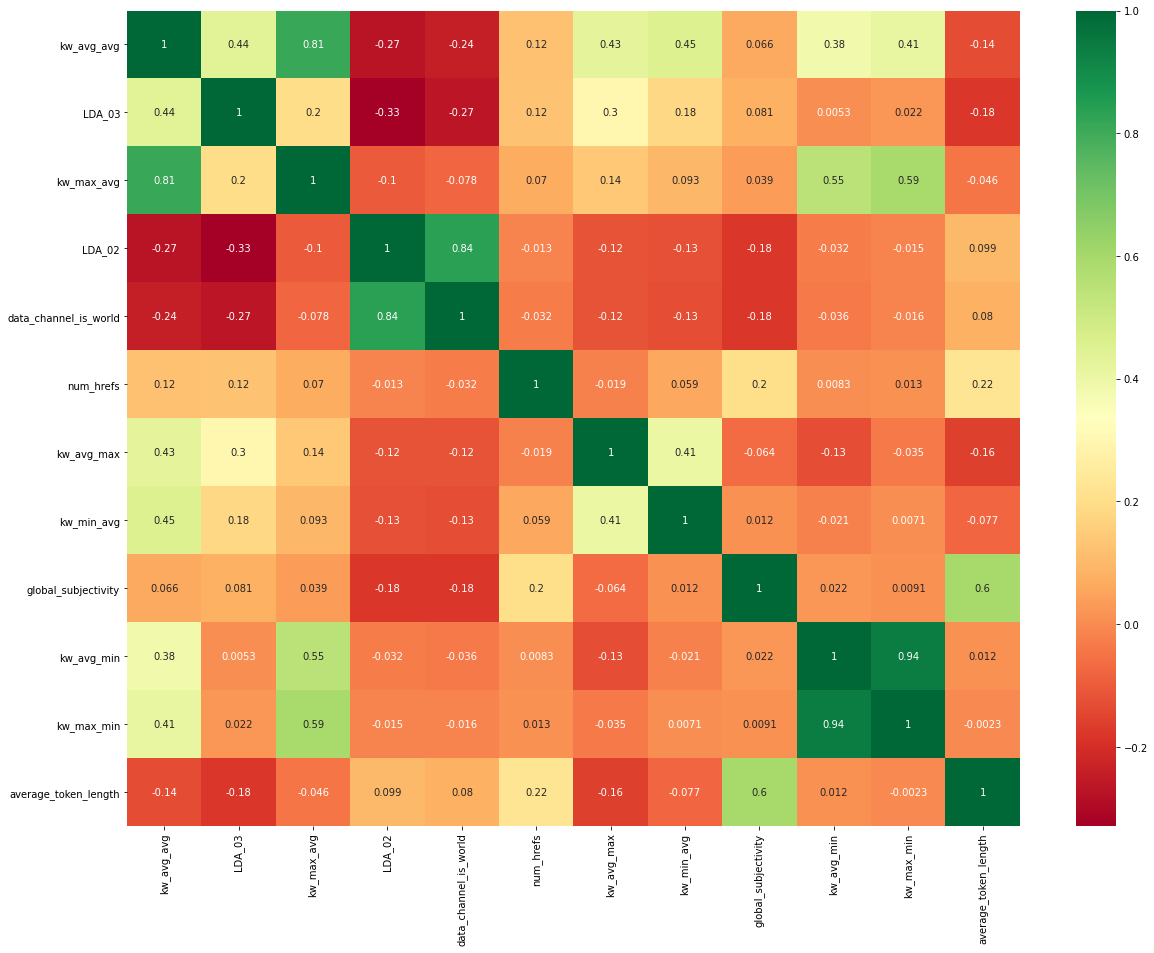

In [47]:
X1 = X[features_list]
plt.subplots(1,1,figsize=(20,15))
sns.heatmap(X1.corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:>

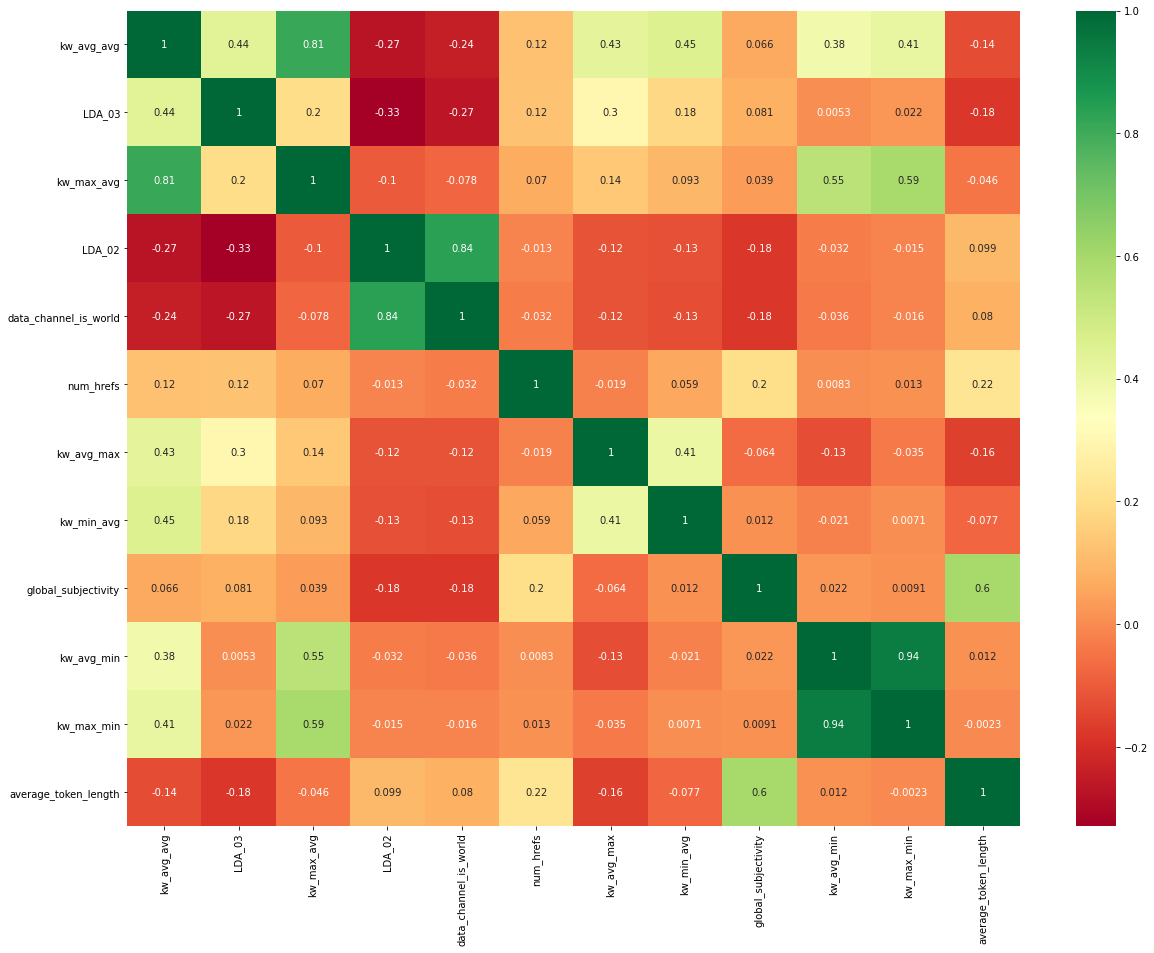

In [48]:
X1 = X[features_list]
plt.subplots(1,1,figsize=(20,15))
sns.heatmap(X1.corr(),annot=True,cmap="RdYlGn")

The highlighted ones are features whose scores are higher in either Correlation and/or ANOVA:

- **kw_avg_avg** - kw_max_avg
- **kw_avg_avg** - kw_min_avg
- **is_weekend** - weekday_is_saturday
- **data_channel_is_world** - LDA_02
- **data_channel_is_entertainment** - LDA_01
- **data_channel_is_tech** - LDA_04 

Following features should be remvoed from above list: kw_max_avg, kw_min_avg, weekday_is_saturday, LDA_02, LDA_01, LDA_04

In [49]:
features_to_remove = ['kw_max_avg','kw_min_avg','weekday_is_saturday','LDA_02','LDA_01','LDA_04']
lst = list(features_list.values)
selected_features = [i for i in lst if i not in features_to_remove]

selected_features 

['kw_avg_avg',
 'LDA_03',
 'data_channel_is_world',
 'num_hrefs',
 'kw_avg_max',
 'global_subjectivity',
 'kw_avg_min',
 'kw_max_min',
 'average_token_length']

By using two features selection techniques we found 20 top features and then we selected common features among them and then removed correlated features. We get the list of features as shown above. They are in the order of importance.

In [50]:
select_data=data[['kw_avg_avg',
 'LDA_03',
 'data_channel_is_world',
 'num_hrefs',
 'kw_avg_max',
 'global_subjectivity',
 'kw_avg_min',
 'kw_max_min',
 'average_token_length']]

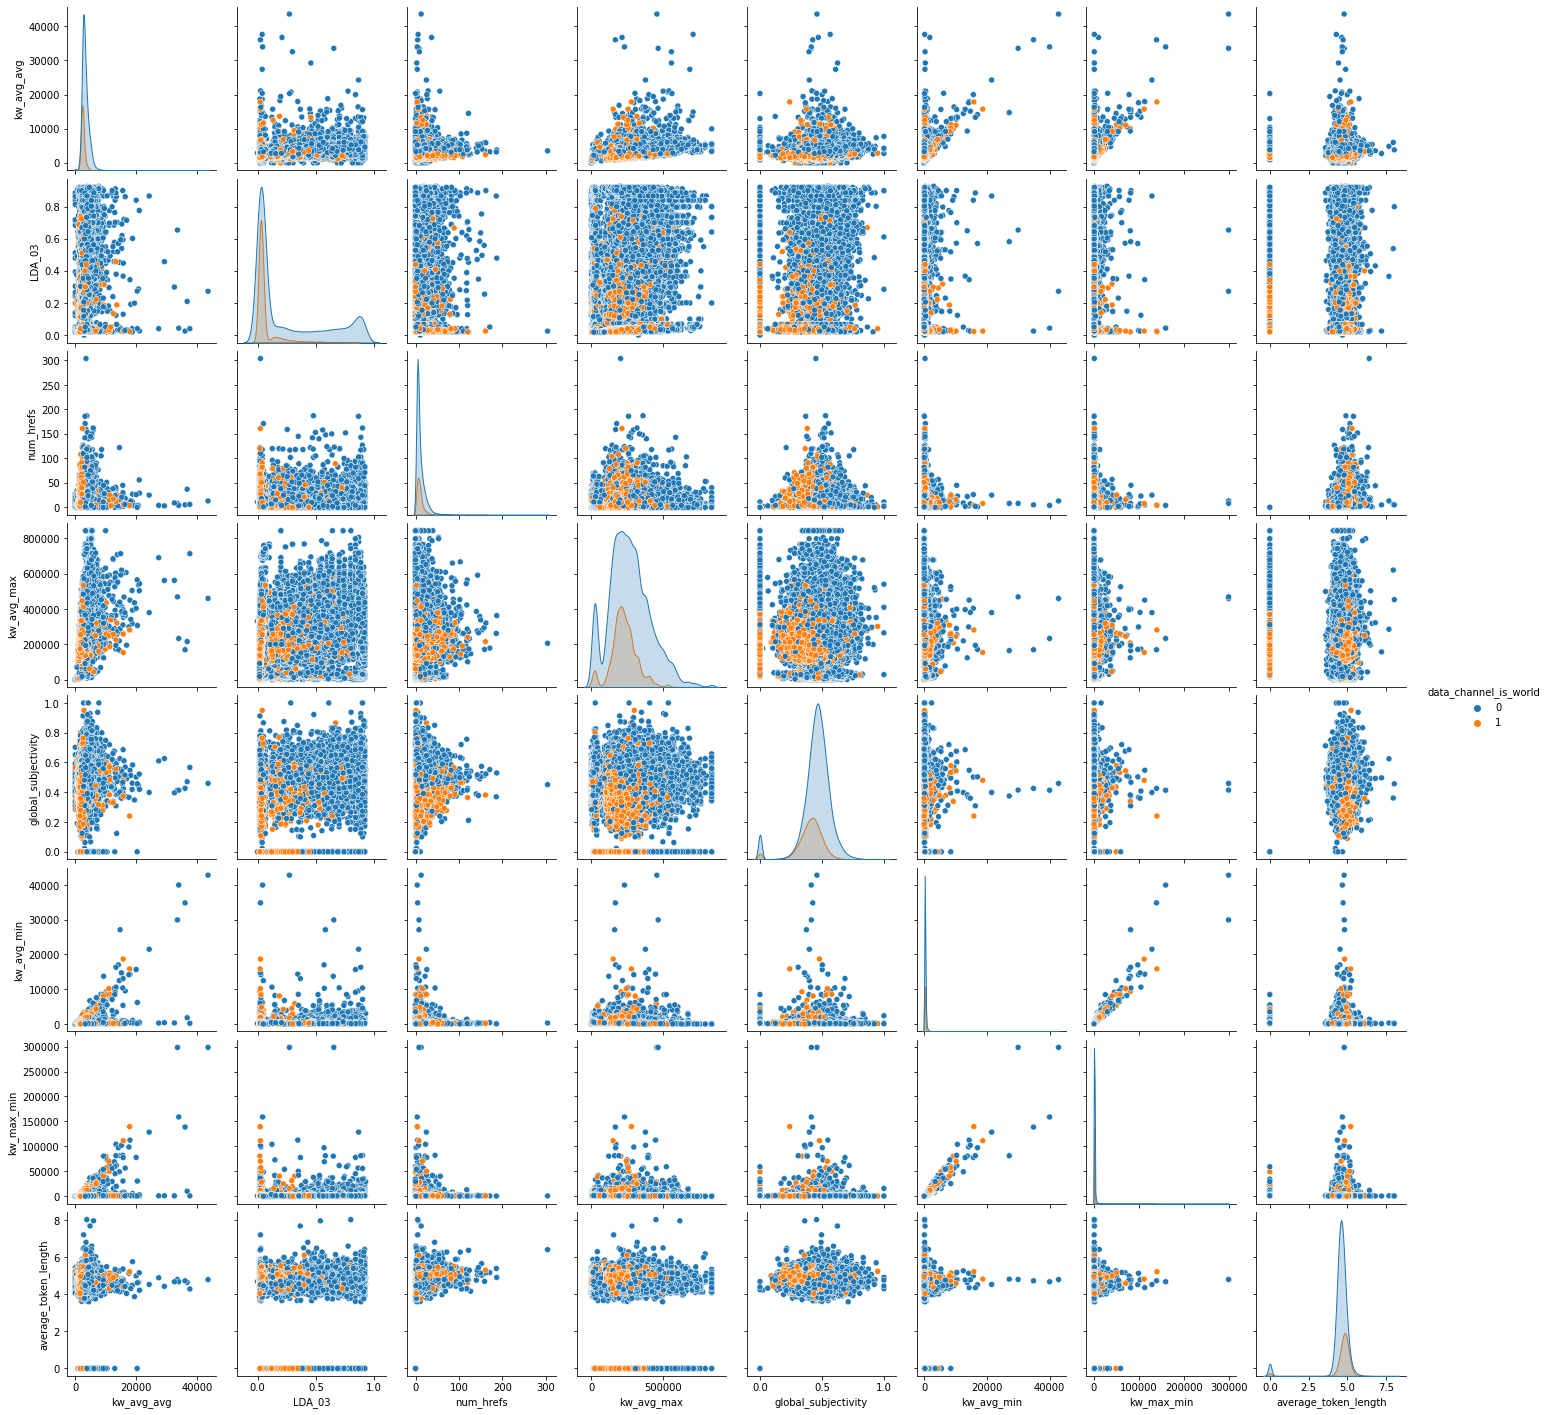

In [51]:
sns.pairplot(select_data,hue = 'data_channel_is_world')

In [52]:
select_data.head()

,kw_avg_avg,LDA_03,data_channel_is_world,num_hrefs,kw_avg_max,global_subjectivity,kw_avg_min,kw_max_min,average_token_length
0,0.0,0.041263,0,4,0.0,0.521617,0.0,0.0,4.680365
1,0.0,0.050101,0,3,0.0,0.341246,0.0,0.0,4.913725
2,0.0,0.033334,0,3,0.0,0.702222,0.0,0.0,4.393365
3,0.0,0.028905,0,9,0.0,0.429850,0.0,0.0,4.404896
4,0.0,0.028572,0,19,0.0,0.513502,0.0,0.0,4.682836


In [53]:
select_data=data[['kw_avg_avg',
 'LDA_03',
 'data_channel_is_world',
 'num_hrefs',
 'kw_avg_max',
 'global_subjectivity',
 'kw_avg_min',
 'kw_max_min',
 'average_token_length','shares']]

In [54]:
select_data.head()

,kw_avg_avg,LDA_03,data_channel_is_world,num_hrefs,kw_avg_max,global_subjectivity,kw_avg_min,kw_max_min,average_token_length,shares
0,0.0,0.041263,0,4,0.0,0.521617,0.0,0.0,4.680365,593
1,0.0,0.050101,0,3,0.0,0.341246,0.0,0.0,4.913725,711
2,0.0,0.033334,0,3,0.0,0.702222,0.0,0.0,4.393365,1500
3,0.0,0.028905,0,9,0.0,0.429850,0.0,0.0,4.404896,1200
4,0.0,0.028572,0,19,0.0,0.513502,0.0,0.0,4.682836,505


In [55]:
select_data.to_csv('Select_OnlineNewsPopularity.csv',index = False)